<a href="https://colab.research.google.com/github/linis7/EDA-Hotel_booking_Analysis/blob/main/HotelBookingAnalysisEDA(Lini_Saxena%2C_Cohort_Hudson).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b> This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

## <b> Explore and analyze the data to discover important factors that govern the bookings.





#### <b> Importing Essential Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### <b> Mounting Drive & Importing Dataset Of Hotel Booking Analysis from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_hba=pd.read_csv("/content/drive/MyDrive/Airbnb NYC 2019.csv")

#### <b>  Data Exploration

In [ ]:
# let's analyze at the first five rows of dataset.
df_hba.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# let's analyze last five rows of dataset.
df_hba.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Let's find out the shape of our dataset.
df_hba.shape

(48895, 16)

In [9]:
# Let's analyze a little bit about our numerical columns of our dataset.
df_hba.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
# let's look at the information of various columns and find out the datatypes and total non null values of various columns.
df_hba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

There are 32 columns of three types (categorical, numerical, binary). Some columns like 'country', 'children', 'company', 'agent' have null values.

In [ ]:
### Let's take a look at individual columns and try to understand them.

In [ ]:
# Let's look at various types of hotel.
print((df_hba["hotel"].unique()))

['Resort Hotel' 'City Hotel']


In [ ]:
# Let's dig deep a little bit in column 'is_canceled' of our dataset.
print(df_hba["is_canceled"].unique())

[0 1]


From unique values of column 'is_canceled' we can assume that 0=(Not Canceled) and 1=(Canceled).

In [ ]:
# Let's explore the column 'arrival_date_year' of dataset.
print(df_hba["arrival_date_year"].unique())

[2015 2016 2017]


From the exploration of "arrival_date_year" column of dataset we can say that it has data of year [2015 2016 2017].

In [ ]:
# Let's find out about various types of meals the customers prefer.
print(df_hba["meal"].unique())

['BB' 'FB' 'HB' 'SC' 'Undefined']


In [ ]:
# Let's explore the column 'arrival_date_month'.
df_hba["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
# Let's explore about the nationality of the customers.
print(df_hba["country"].unique())

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' 'DMA'

In [ ]:
# Market Sagment of the hotels are
print(df_hba["market_segment"].unique())

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [ ]:
# Let's explore about distribution channel of the hotels.
print(df_hba["distribution_channel"].unique())

['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


In [ ]:
# Let's explore the 'is_repeated_guest' column of the dataset.
print(df_hba["is_repeated_guest"].unique())

[0 1]


From exploration of the 'is_repeated_guests' column of dataset we can assume that 0=(Customer is not repeated) and 1=(Customer is Repeated).

In [ ]:
# Let's explore the 'reserved_room_type' column of the dataset.
print(df_hba["reserved_room_type"].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


In [ ]:
# Lets explore the 'assigned_room_type' column of the dataset
print(df_hba["assigned_room_type"].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


From the exploration of columns 'reserved_room_type', 'assigned_room_type' of dataset, 
we can assume the many times the room type reserved by the customer and the room type assigned by the hotel to the customer are different 
and it may lead to booking cancelation.
We will dig deep into it during Bivariate analysis.

In [ ]:
# Let's explore the column 'deposit_type' of dataset.
print(df_hba["deposit_type"].unique())

['No Deposit' 'Refundable' 'Non Refund']


We can look into the connection of 'deposit type' and 'cancellation'.

In [ ]:
# Let's explore the 'customer_type' column of dataset.
print(df_hba["customer_type"].unique())

['Transient' 'Contract' 'Transient-Party' 'Group']


In [ ]:
# Let's explore the 'reservation_status' column of dataset
print(df_hba["reservation_status"].unique())

['Check-Out' 'Canceled' 'No-Show']


**Data Description**

'''
The summary of our findings and our understandings about various columns after the data exploration of dataset is as follows:

- **hotel**: Type of hotel ( City or Resort).

- **is_canceled**: Whether the booking is canceled or not (0 for not canceled and 1 for canceled).

- **lead_time**: Time in days between booking transaction and actual arrival.

- **arrival_date_year**: The year of arrival ([2015, 2016, 2017]).

- **arrival_date_month**: The month of arrival.

- **arrival_date_week_number**: The week number of the year of arrival date.

- **arrival_date_day_of_month**: The day of month of arrival date.

- **stays_in_weekend_nights**: Number of nights spent in a hotel on weekends.

- **stays_in_week_nights**: Number of nights spent in a hotel on Weekdays.

- **adults**: Number of adults in single booking record.

- **children**: Number of children in single booking record.

- **babies**: Number of babies in single booking record. 

- **meal**: Type of meal chosen [BB-Bed and Breakfast, FB- Full Board(Breakfast Lunch and Dinner), HB-Half Board(Breakfast and Dinner), SC-Self Catering]

- **country**: Country of origin of customers.

- **market_segment**: By which segment was booking  made and for what purpose [Direct, Corporate, Online TA(Travel Agents), Offline TA(Travel agents)//TO(Tour Operators), Complementary, Groups, Undefined, Aviation].

- **distribution_channel**: Via which medium booking was made(Medium type=[Direct', Corporate, TA(Travel agents)/TO(Tour Operators), Undefined, GDS]).

- **is_repeated_guest**: Whether the customer has made any booking before(0 for No and 1 for Yes).    

- **previous_cancellations**: Number of previous canceled bookings.

- **previous_bookings_not_canceled**: Number of previous non-canceled bookings.

- **reserved_room_type**: Room type reserved by a customer(Room Type=[C, A, D, E, G, F, H, L, P, B]).

- **assigned_room_type**: Room type assigned to the customer (Room Type=[C, A, D, E, G, F, H, L, P, B]).

- **booking_changes**: Number of of booking changes done by customers.

- **deposit_type**: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund).

- **agent**: Id of agent for booking.

- **company**: Id of the company making a booking.

- **days_in_waiting_list**: Number of days on waiting list.

- **customer_type**: Type of customer(Transient, Contract, Transient-Party, Group).

- **adr**: Average Daily rate=(Rooms revenue/Rooms sold).

- **required_car_parking_spaces**: Number of car parking asked in booking.

- **total_of_special_requests**: total number of special request.

- **reservation_status**: Whether a customer has checked out or canceled,or not showed.

- **reservation_status_date**: Date of making reservation status.
'''

#### <b> Data cleaning

##### <i> 1). Handling Null Values and Duplicates.

In [10]:
# Checking for columns with Null values.
df_hba.isnull().sum().reset_index().rename(columns = {"index":"column_name", 0:"null_values"}).sort_values(["null_values"], ascending = False).reset_index().drop(["index"], axis=1)[0:5]

,column_name,null_values
0,last_review,10052
1,reviews_per_month,10052
2,host_name,21
3,name,16
4,id,0


From the above exploration of columns with Null values, we can see that column 'agent' and 'company' has large amount of NUll values.
 We have to take care of this.

In [ ]:
# Creating a copy of dataset so the original dataset will not be affected during data cleaning process
df_hba1 = df_hba.copy()

In [ ]:
# Let's check the copy of our dataset
df_hba1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


From above columns we can see that the column 'company' of the dataset has large amount of null values. So we will remove the column 'company' from the dataset.

In [ ]:
# Droping the column 'company' from the dataset.
df_hba1.drop(["company"], axis = 1, inplace = True)

In [ ]:
# Replacing the null values in column 'children' with 0.
df_hba1["children"].fillna(0, inplace = True)

In [ ]:
# Replacing the null values in column 'agent' with 0.
df_hba1["agent"].fillna(0, inplace = True)

In [ ]:
# Replacing the null values in column 'country' with (other country).
df_hba1["country"].fillna("other country", inplace = True)

In [ ]:
# Checking for duplicate rows in the dataset.
df_hba1.duplicated().sum()

32001

We can see that our Data Frame contains 32001 duplicate rows. So we are going to remove them.

In [ ]:
# Droping the duplicate rows.
df_hba1.drop_duplicates(inplace = True)

In [ ]:
# Checking if there are any duplicate rows.
df_hba1.duplicated().sum()

0

Hence all the duplicate rows have been removed.

In [ ]:
# Checking if there are still any Null values in the columns of the dataset.
df_hba1.isnull().sum().reset_index().rename(columns = {"index":"column_name", 0:"null_values"})

,column_name,null_values
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


Now there are no Null values in our Data Frame.

###### <i> 2. Creating new columns. 

In [ ]:
# Creating a column 'total_guests' 
df_hba1["total_guests"] = df_hba1["adults"] + df_hba1["children"] + df_hba1["babies"]

In [ ]:
# Creating a columns stays_in_total_nights
df_hba1["stays_in_total_nights"] = df_hba1["stays_in_weekend_nights"] + df_hba1["stays_in_week_nights"]

In [ ]:
# Checking for false bookings if any.
df_hba1[(df_hba1["total_guests"] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,stays_in_total_nights
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,0.0,3
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,0.0,0
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,0.0,3
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,0.0,5
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30,0.0,3
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01,0.0,1
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17,0.0,2
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,0.0,7


Looks like in 166 cases the total number of guests are 0 which implies that these are false bookings or wrong entries. So we have to drop these rows for further analysis.

In [ ]:
# Replacing the value 0 with Null value in 'total_guests' in order to drop the rows.
df_hba1["total_guests"].replace(to_replace = [0], value = [np.nan], inplace = True)

In [ ]:
# Droping the rows containing false booking.
df_hba1.dropna(subset = ["total_guests"], inplace = True)

In [ ]:
# Checking if there are any rows containing false booking left.
df_hba1["total_guests"].isnull().sum()

0

In [ ]:
# Checking the shape of dataset after data cleaning.
df_hba1.shape

(87223, 33)

##### <i> 3. Essential Changes in the datatype of  columns. 

In [ ]:
# Importing the datetime library.
from datetime import datetime
from datetime import date

In [ ]:
# Checking the datatype of column "reservation_status_date".
type(df_hba1["reservation_status_date"][0])

str

In [ ]:
# Converting the datatype of column "reservation_status_date" to timestamp.
df_hba1["reservation_status_date"] = df_hba1["reservation_status_date"].apply(lambda z: datetime.strptime(z,"%Y-%m-%d"))


In [ ]:
# Checking the datatype of column "reservation_status_date" again after converting.
type(df_hba1["reservation_status_date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Checking for datatypes of various columns
df_hba1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87223 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87223 non-null  object        
 1   is_canceled                     87223 non-null  int64         
 2   lead_time                       87223 non-null  int64         
 3   arrival_date_year               87223 non-null  int64         
 4   arrival_date_month              87223 non-null  object        
 5   arrival_date_week_number        87223 non-null  int64         
 6   arrival_date_day_of_month       87223 non-null  int64         
 7   stays_in_weekend_nights         87223 non-null  int64         
 8   stays_in_week_nights            87223 non-null  int64         
 9   adults                          87223 non-null  int64         
 10  children                        87223 non-null  float64       
 11  b

In [ ]:
# Converting the datatype of column 'children' to int
df_hba1["children"] = df_hba1["children"].astype(int)

In [ ]:
# Converting the datatype of column 'agent' to int
df_hba1["agent"] = df_hba1["agent"].astype(int)

In [ ]:
# Converting the datatype of column 'total_guests' to int
df_hba1["total_guests"] = df_hba1["total_guests"].astype(int)

#### <b> EDA (Exploratory Data Analysis)

##### <i> <b> Correlation Heatmap

In [ ]:
# Creating the correlation heatmap.
correlation = df_hba1[["total_guests", "children", "babies", "is_canceled", "lead_time","days_in_waiting_list", "stays_in_total_nights", "adr", "required_car_parking_spaces", "arrival_date_week_number", "previous_cancellations", "previous_bookings_not_canceled", "days_in_waiting_list", "total_of_special_requests", "booking_changes"]]

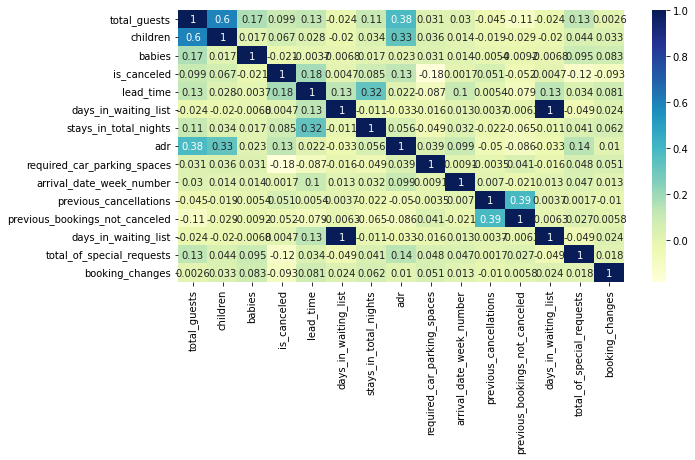

In [ ]:
plt.subplots(figsize=(10, 5))
sns.heatmap(correlation.corr(), cmap="YlGnBu", annot=True)



1.   stays_in_total_nights and lead_time have slight correlation. This shows that long stays or vacations are planned way before the arrival. 
2.   adr and total_people are positively correlated which is true as more number of people means more booking hence more revenue therefore more adr. 



##### <i> Q1. Which meal type is preferred more by guests?

In [ ]:
df_hba1["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
# Creating the table of preferred meal type bu the guests.
df_meal = df_hba1[df_hba1["meal"] != "Undefined"]
df_meal = df_meal.groupby(["meal"])["is_canceled"].count().reset_index().rename(columns = {"meal" : "Meal Type", "is_canceled" : "Orders"})
df_meal

,Meal Type,Orders
0,BB,67900
1,FB,360
2,HB,9080
3,SC,9391


([<matplotlib.patches.Wedge at 0x7fc535a401d0>,
 [Text(-0.7565106208607357, -0.93149969432357, 'BB'),
  Text(1.1711727545345954, 0.26144670400647324, 'FB'),
  Text(1.0157028841500861, 0.6390208534384435, 'HB'),
  Text(0.40036894970884745, 1.1312403387914678, 'SC')],
 [Text(-0.44129786216876243, -0.5433748216887492, '78.29%'),
  Text(0.6831841068118473, 0.15251057733710938, '0.42%'),
  Text(0.5924933490875502, 0.3727621645057587, '10.47%'),
  Text(0.23354855399682767, 0.6598901976283561, '10.83%')])

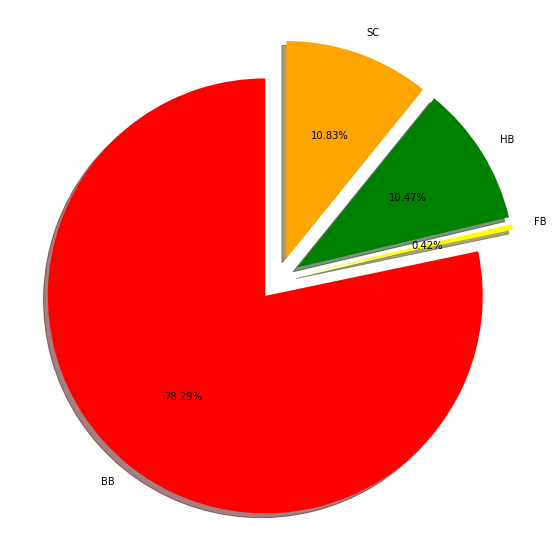

In [ ]:
# Plotting the graph of above table to draw insights.
plt.figure(figsize = (15,10))
plt.pie(df_meal["Orders"],labels=df_meal["Meal Type"], colors=["Red", "Yellow", "Green", "Orange"], startangle=90, shadow=True, explode=(0.1, 0.1, 0.1, 0.1), autopct="%1.2f%%")

1.   Hence the meal type 'Bed and Breakfast' is preferred the most by the guests.
2.   Hotels should focus more of the quality of meal type 'Bed and Breakfast'
as it is the most preferred type of meal.

##### <i> Q2. Which type of customers make more number of bookings?

In [ ]:
df_hba1["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

1. Contract: When the booking has an allotment or other type of contract associated to it.

2. Group: When the booking is associated to a group.

3. Transient: When the booking is not part of a group or contract, and is not associated to other transient booking.

4. Transient-party: When the booking is transient, but is associated to at least other transient booking.



In [ ]:
# Creating the table for customer types and No. of bookings.
df_customer_type = df_hba1.groupby(["customer_type"])["meal"].count().reset_index().rename(columns = {"customer_type" : "Customer Type", "meal" : "No. of bookings"})
df_customer_type

,Customer Type,No. of bookings
0,Contract,3135
1,Group,541
2,Transient,71857
3,Transient-Party,11689


<Figure size 576x360 with 0 Axes>

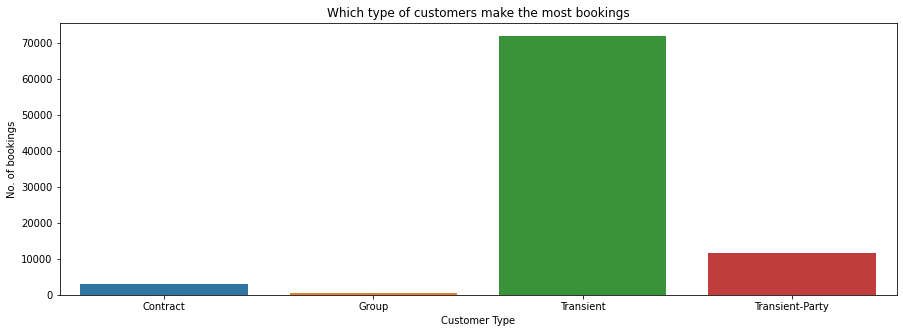

<Figure size 576x360 with 0 Axes>

In [ ]:
# Plotting the graph of the above table to take insights.
plt.title("Which type of customers make the most bookings")
sns.barplot(x = "Customer Type", y = 'No. of bookings', data = df_customer_type)
plt.figure(figsize = (8,5))

1.   From the above table we can see that 'Transient' customer type made the most number of bookings.
2.   Hotels should create ambience by keeping the Transient customer type in mind in order to make more customer retention.

##### <i> Q3. Whc

##### <i> <b> Q3. Which type of hotel is mostly booked by guests?

In [ ]:
# Creating the table for plotting graph
df_hba["hotel"].value_counts().reset_index().rename(columns = {"index" : "Hotel Type", "hotel" : "No. of Hotel"})


,Hotel Type,No. of Hotel
0,City Hotel,79330
1,Resort Hotel,40060


([<matplotlib.patches.Wedge at 0x7fc535a28710>,
 [Text(-1.0433630545977797, -0.5927845614558386, 'City Hotel'),
  Text(0.9564161333812984, 0.5433858480011848, 'Resort Hotel')],
 [Text(-0.6086284485153713, -0.3457909941825724, '66.45%'),
  Text(0.52168152729889, 0.29639228072791896, '33.55%')])

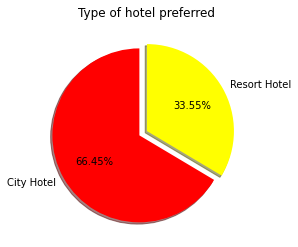

In [ ]:
# Plotting the graph for above hotel
labels=list(df_hba["hotel"].value_counts().index)
sizes=list(df_hba["hotel"].value_counts())
colors=["red","yellow"]
plt.title("Type of hotel preferred")
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True, explode=(0.1,0), autopct="%1.2f%%")

As we can see that City Hotel has more bookings(almost double) in comparison to Resort hotel.

##### <i> Q4. What is relationship between Hotel Type and Total Stay?

In [ ]:
# Making the table of hotel type and total stays.
not_canceled = df_hba1[df_hba1['is_canceled'] == 0]
df_hrt = not_canceled[not_canceled["stays_in_total_nights"] < 15]
df_hrt.groupby(["hotel", "stays_in_total_nights"])["stays_in_total_nights"].sum().unstack()

stays_in_total_nights,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
hotel,,,,,,,,,,,,,,,
City Hotel,0,7970,15260,27900,26092,14515,6150,8043,1560,999,780,341,360,195,364
Resort Hotel,0,6031,7802,9549,11608,8895,6672,28434,3744,3546,6580,2508,1068,897,8540


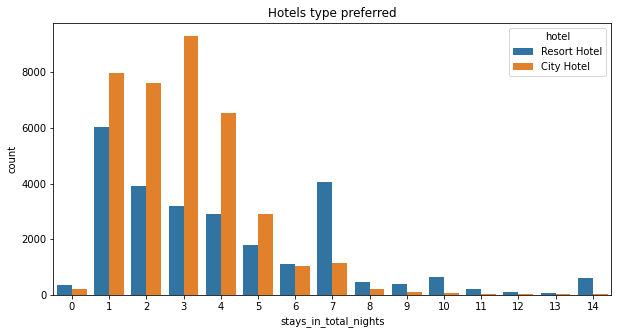

In [ ]:
# Plotting the graph of above table in order to darw insights.
plt.figure(figsize = (10,5))
plt.title("Hotels type preferred")
sns.countplot(x = df_hrt['stays_in_total_nights'], hue = df_hrt['hotel'])
plt.show()



1.   From the above analysis we can conclude that customers are preferring City Hotel for shorter stays(less than 6 days) & Resort Hotels are preferred for longer stays(more than or equal to 6 days).
2.   From the above graph it is clearly visible that for the stay of exactly 7, 10 or 14 days (especially 7 days) customers prefer the Resort hotels (May be for mini vacation or to celebrate functions like engagements or marriages, office success parties or other close intimate events.).




##### <i> Q4. Which type of hotel generates more revenue?

Text(0.5, 1.0, 'Outliers in adr')

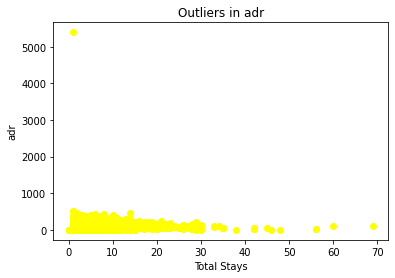

In [ ]:
# Let's look if there are any outliers in adr
plt.scatter(df_hba1["stays_in_total_nights"], df_hba1["adr"], c ="yellow")
plt.xlabel("Total Stays")
plt.ylabel("adr")
plt.title("Outliers in adr")

We can see that the 'total stay' less than 15 days and 'adr' less than 1000 are closely connected. We will consider the rest outliers and will ignore them during the analysis.

We noticed that there is an outlier in adr, so we will have to remove that.

In [ ]:
# Removing the outlier of the adr. 
df_hba1.drop(df_hba1[df_hba1["adr"] > 5000].index, inplace = True)

In [ ]:
# Deciding the graph size.
plt.rcParams["figure.figsize"] = (15,5)

Text(0.5, 1.0, 'Relation between total stay and adr')

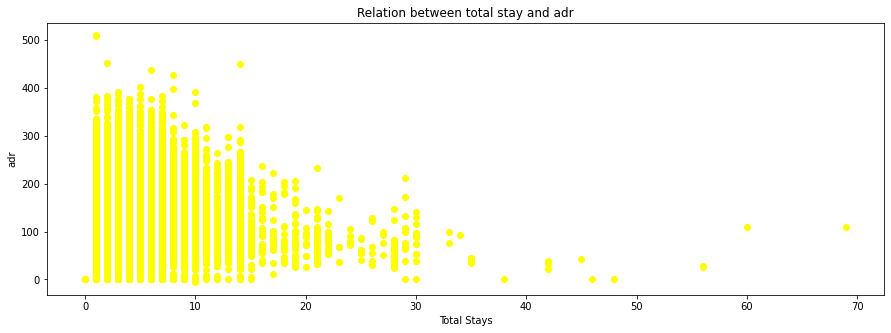

In [ ]:
# Let's look at the scatter plot again after removing the outliers.
plt.scatter(df_hba1["stays_in_total_nights"], df_hba1["adr"], c ="yellow")
plt.xlabel("Total Stays")
plt.ylabel("adr")
plt.title("Relation between total stay and adr")

Hence the outlier in adr is removed.

In [ ]:
# Finding out the revenue generated by both the hotel types.
df_revenue=df_hba1.groupby(["hotel"])["adr"].mean()
df_revenue=df_revenue.reset_index().rename(columns = {"adr" : "Revenue", "hotel" : "Hotel Type"})
df_revenue

,Hotel Type,Revenue
0,City Hotel,111.172023
1,Resort Hotel,99.064474


<Figure size 576x360 with 0 Axes>

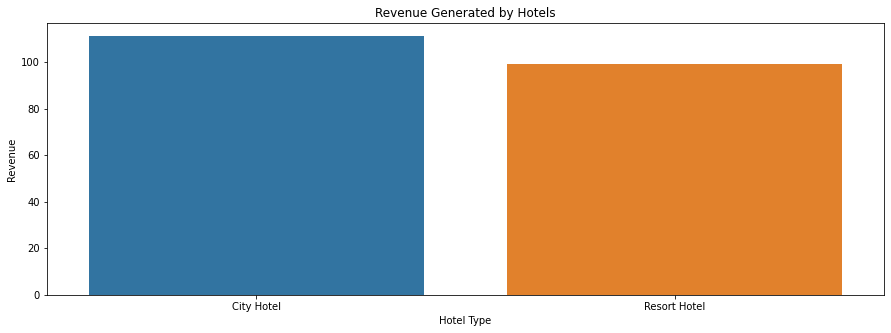

<Figure size 576x360 with 0 Axes>

In [ ]:
# Plotting the graph of the above table to take insights.
plt.title("Revenue Generated by Hotels")
sns.barplot(x = "Hotel Type", y = 'Revenue', data = df_revenue)
plt.figure(figsize = (8,5))




1.   From the above analysis we can conclude that City Hotels are generating more revenue in comparison to Resort Hotels.
2.   Although City Hotels are booked almost twice more than Resort Hotels, the difference in revenue of City Hotels and Resort Hotels is very less as people prefer resort hotels for longer stays and as we have assumed that Resort hotels are preferred for close intimate events which increase the revenue of the Resort Hotels.
   


##### <i> Q5. Which Hotel has high lead time?

In [ ]:
# Creating the table for lead time for hotel type.
df_hlt = df_hba1.groupby(["hotel"])["lead_time"].median().reset_index().rename(columns= {"hotel" : "Hotel Type", "lead_time" : "Lead Time"})
df_hlt

,Hotel Type,Lead Time
0,City Hotel,51.0
1,Resort Hotel,47.0


<Figure size 720x360 with 0 Axes>

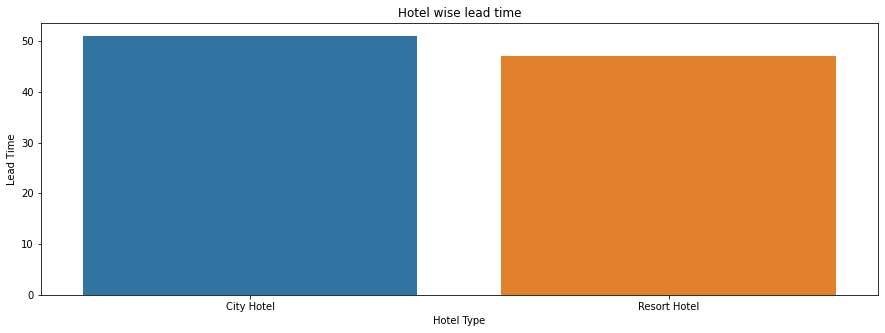

<Figure size 720x360 with 0 Axes>

In [ ]:
#  Plotting the graph of above table to draw insights.
plt.title("Hotel wise lead time")
sns.barplot(x = 'Hotel Type', y = 'Lead Time', data = df_hlt)
plt.figure(figsize = (10,5))

1.   Lead time of both type of hotels are more or less similar, so from the above graph we can conclude that customers prefer to book hotel approximately 45 days before the checkin.

##### <i> Q6. Which type of hotel has higher waiting period?

In [ ]:
# Creating the table for Avg waiting time for hotel type.
df_hwp = df_hba1.groupby(["hotel"])["days_in_waiting_list"].mean().reset_index().rename(columns={"hotel" : "Hotel Type", "days_in_waiting_list" : "Avg Waiting Period"})
df_hwp

,Hotel Type,Avg Waiting Period
0,City Hotel,1.020124
1,Resort Hotel,0.316810


<Figure size 720x360 with 0 Axes>

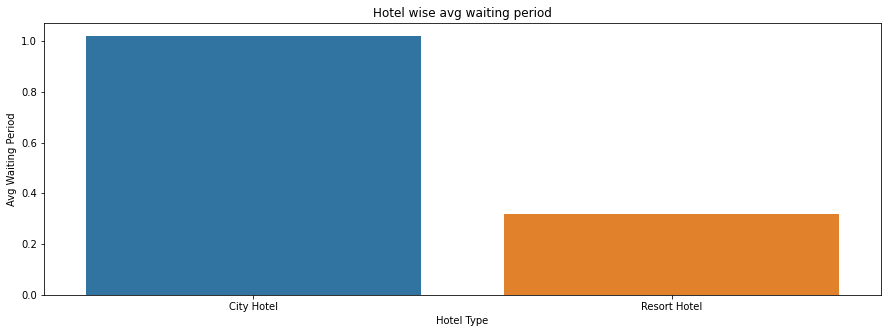

<Figure size 720x360 with 0 Axes>

In [ ]:
#  Plotting the graph of above table to draw insights.
plt.title("Hotel wise avg waiting period")
sns.barplot(x = 'Hotel Type', y = 'Avg Waiting Period', data = df_hwp)
plt.figure(figsize = (10,5))

Hence we can conclude that City Hotels have more waiting period hence City hotels are much more busy in comparison to Resort Hotels.

##### <i> Q7. Which type to hotel has high booking cancellation?

In [ ]:
# Creating the table of total bookings hotelwise.
df_total_bookings = df_hba1.groupby(["hotel"])["is_canceled"].count().reset_index().rename(columns ={"hotel" : "Hotel Type", "is_canceled" : "Total Bookings"})

# Creating a table of canceled bookings hotelwise.
df_c = df_hba1[df_hba1["is_canceled"]==1]
df_canceled_bookings = df_c.groupby(["hotel"])["is_canceled"].count().reset_index().rename(columns = {"hotel" : "Hotel Type", "is_canceled" : "Canceled Bookings"})

# Joining the table of hotelwise total and canceled bookings.
df_hbc = pd.merge(df_total_bookings, df_canceled_bookings, how = "left", left_on = "Hotel Type", right_on ="Hotel Type")

# Adding a column of percentage canceled booking.
df_hbc["Percentage Cancellation"] = round((df_hbc["Canceled Bookings"] * 100) / df_hbc["Total Bookings"], 2)
df_hbc




,Hotel Type,Total Bookings,Canceled Bookings,Percentage Cancellation
0,City Hotel,53271,16034,30.10
1,Resort Hotel,33951,7974,23.49


<Figure size 720x360 with 0 Axes>

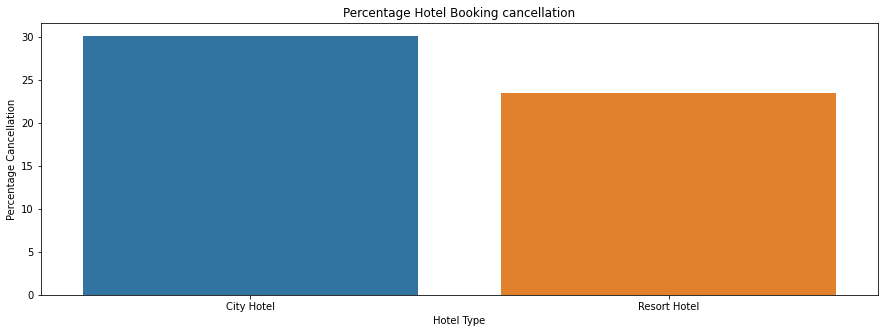

<Figure size 720x360 with 0 Axes>

In [ ]:
# Plotting the graph of the hotel booking cancellation table in order to drive the insights.
plt.title("Percentage Hotel Booking cancellation")
sns.barplot(x = "Hotel Type", y = 'Percentage Cancellation', data = df_hbc)
plt.figure(figsize = (10,5))

1.   So from Q4, Q5, Q6 we can conclude that hotel cancellation is not related with waiting period or lead time. Thus our Correlation heatmap is relevant.
2.   City Hotels are prefered more for casual stays and Resort Hotels are prefered more for events hence cancellation is more in City Hotels.

##### <i> Q8. Which hotel type has higher number of repeated guests?

In [ ]:
df_hba1["is_repeated_guest"].unique()

array([0, 1])

In [ ]:
# Creating a table for hotelwise total guests
df_total_guests = df_hba1.groupby(["hotel"])["is_repeated_guest"].count().reset_index().rename(columns = {"hotel" : "Hotel Type", "is_repeated_guest" : "Total Families"})

# Creating a table for hotelwise repeated guests.
df1 = df_hba1[df_hba1["is_repeated_guest"] == 1]
df_is_repeated_guest = df1.groupby(["hotel"])["is_repeated_guest"].count().reset_index().rename(columns = {"hotel" : "Hotel Type", "is_repeated_guest" : "Repeated Families"})

# Merging the above two tables.
df_repeated_guest = pd.merge(df_total_guests, df_is_repeated_guest, how = "left", left_on = "Hotel Type", right_on = "Hotel Type")
df_repeated_guest

# Adding new columns for percentage of repeated families.
df_repeated_guest["Percentage repeated families"] = round((df_repeated_guest["Repeated Families"] * 100) / df_repeated_guest["Total Families"], 2)
df_repeated_guest









,Hotel Type,Total Families,Repeated Families,Percentage repeated families
0,City Hotel,53271,1657,3.11
1,Resort Hotel,33951,1707,5.03


<Figure size 720x360 with 0 Axes>

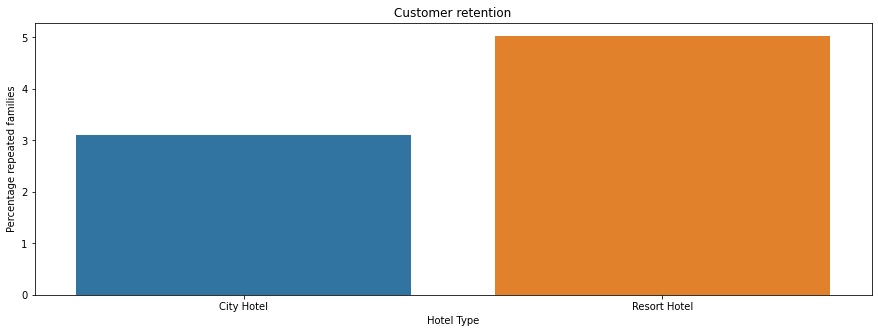

<Figure size 720x360 with 0 Axes>

In [ ]:
# Plotting the graph of the repeated families table in order to drive the insights.
plt.title("Customer retention")
sns.barplot(x = "Hotel Type", y = 'Percentage repeated families', data = df_repeated_guest)
plt.figure(figsize = (10,5))



As we can see customer retention of Resort Hotel is slightly more than City Hotel because City hotels are used more for Casual stays but the Resort hotels are more used for intimate events.




##### <i> Q4. Which year witnessed the highest number of guests?

In [ ]:
# Creating a yearwise table of total number of guests.
df_yearly_guests = df_hba1.groupby(["arrival_date_year", "hotel"])["total_guests"].sum()
df_yearly_guests = df_yearly_guests.reset_index().rename(columns= {"arrival_date_year" : "Year", "total_guests" : "Guests Arrived", "hotel" : "Hotel Type"})
df_yearly_guests

,Year,Hotel Type,Guests Arrived
0,2015,City Hotel,11939
1,2015,Resort Hotel,14029
2,2016,City Hotel,54130
3,2016,Resort Hotel,31284
4,2017,City Hotel,41611
5,2017,Resort Hotel,23995


<Figure size 720x360 with 0 Axes>

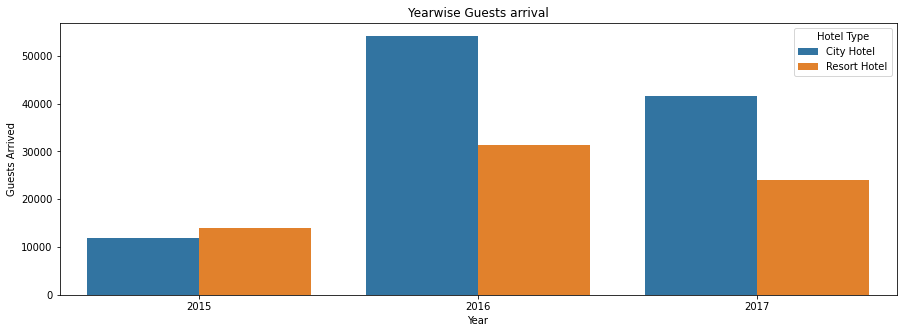

<Figure size 720x360 with 0 Axes>

In [ ]:
# Plotting the graph of above table.
plt.title("Yearwise Guests arrival")
sns.barplot(x = 'Year', y = 'Guests Arrived', data = df_yearly_guests, hue = df_yearly_guests['Hotel Type'])
plt.figure(figsize = (10,5))

1.   From above analysis we can see that the year 2016 witnessed maximum number of guests followed by the year 2017.
2.   Altough the year 2015 witnessed the minimum number of guests, in the year 2015 Resort hotel type booking is more than City hotel.

##### <i> Q5. What is the nationality of the guests?

In [ ]:
# Finding out the nationality of the maximum number of guests.
df_nationality = df_hba1.groupby(["country"])["total_guests"].sum().sort_values(ascending = False)[:10]
df_nationality = df_nationality.reset_index().rename(columns = {"country" : "Country", "total_guests" : "Total Guests"})
df_nationality

,Country,Total Guests
0,PRT,52138
1,GBR,21383
2,FRA,18655
3,ESP,15681
4,DEU,10809
5,ITA,6503
6,IRL,6235
7,BRA,4398
8,BEL,4396
9,NLD,3906


In [ ]:
# Total number of european guests.
european_guests = df_nationality["Total Guests"].sum() - df_nationality.iloc[7,1]
european_guests

139706

In [ ]:
# Total number of guests in the dataset.
total_guests = df_hba1.groupby(["country"])["total_guests"].sum().sum()
total_guests

176988

In [ ]:
# Finding the total number of non european guests.
total_non_european_guests = total_guests - european_guests
total_non_european_guests

37282

In [ ]:
df_european_dominance = pd.DataFrame([139706, 37282], index = ["European Guests", "Guests From rest of the world"]).reset_index().rename(columns = {"index" : "Nationality", 0 : "No. of guests"})
df_european_dominance

,Nationality,No. of guests
0,European Guests,139706
1,Guests From rest of the world,37282


<Figure size 720x360 with 0 Axes>

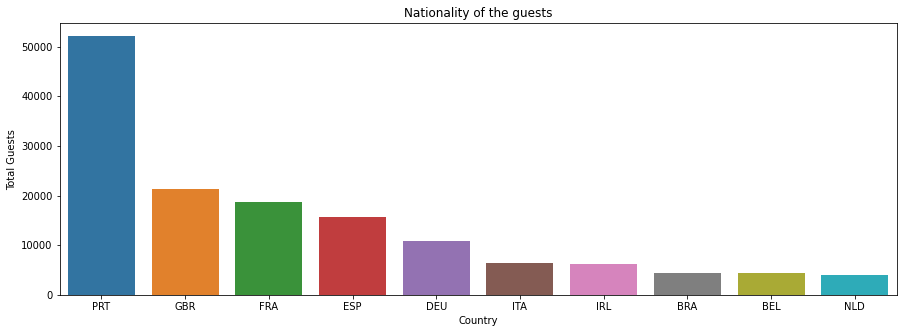

<Figure size 720x360 with 0 Axes>

In [ ]:
# Plotting the graph of the nationality table in order to drive the insights.
plt.title("Nationality of the guests")
sns.barplot(x = "Country", y = 'Total Guests', data = df_nationality)
plt.figure(figsize = (10,5))

([<matplotlib.patches.Wedge at 0x7f131e6b1150>,
 [Text(-0.7374143750116353, -0.9466889877495139, 'European Guests'),
  Text(0.6759631770939991, 0.8677982387703878, 'Guests From rest of the world')],
 [Text(-0.43015838542345386, -0.552235242853883, '78.94%'),
  Text(0.36870718750581766, 0.4733444938747569, '21.06%')])

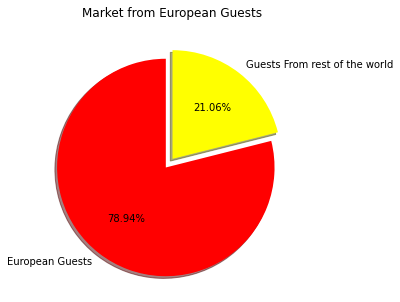

In [ ]:
colors=["red","yellow"]
plt.title("Market from European Guests")
plt.pie([139706, 37282],labels = ["European Guests", "Guests From rest of the world"], colors=colors, startangle=90, shadow=True, explode=(0.1,0), autopct="%1.2f%%")



1.   From the above graph we can see that most number of guests are from PORTUGAL followed by GREAT BRITAIN and FRANCE. 
2.   9 out of 10 max guests's nationality belongs to the European countries.
3.   Out of 176990 guests 139708 guest's nationality belongs to EUROPE, which is roughly 79% of total guests. So it is safe to conclude that data in this dataset is of European hotels.







##### <i> Q6. Which time of the year is best to stay in hotel?

The time of the year when the hotels are the busiest can be inferred as vacation time or the best time of the year to stay in the hotel.

In [ ]:
# Creating a new column 'month' in the dataset.
df_hba1["month"]=df_hba1["reservation_status_date"].apply(lambda z: datetime.strftime(z,"%Y-%m-%d")[5:7])

In [ ]:
# Preparing the table of monthwise total guests in order to plot the graph.
df_month_wise_bookings=df_hba1.groupby(["month"])["total_guests"].sum()
df_month_wise_bookings.rename(index= {"01" : "January", "02" : "February", "03" : "March", "04" : "April", "05" : "May", "06" : "June", "07" : "July", "08" : "August", "09" : "September", "10" : "October", "11" : "November", "12" : "December"}, inplace = True)
df_month_wise_bookings.reset_index()

,month,total_guests
0,January,12900
1,February,14114
2,March,15937
3,April,15975
4,May,16264
5,June,14884
6,July,19677
7,August,20923
8,September,13609
9,October,12973


Text(0, 0.5, 'No. of booking')

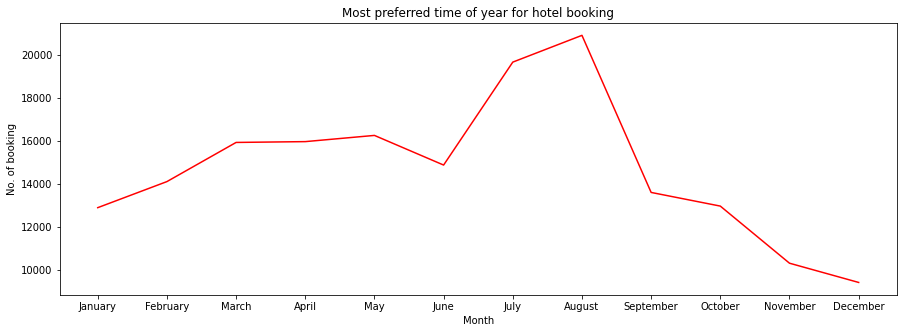

In [ ]:
# Plotting the graph in order to draw insights.
plt.plot(df_month_wise_bookings, color = "red")
plt.title("Most preferred time of year for hotel booking")
plt.xlabel("Month")
plt.ylabel("No. of booking")
# plt.rcParams["figure.figsize"]=(15,5)



1.   As we can see that instead of the month of DECEMBER the total number of guests in every month are more than 10k. But from the graph there is a very clear visible spike is in the month of JULY and AUGUST, so we can conclude that the best time of the year to book a hotel is in JULY and AUGUST.
2.   The above graph further supports our assumption that the data in the dataset is of European Hotels, as during the month of JULY and AUGUST it is summers in Europe and the weather, natural sceneries and landscapes are breathtaking therefore the tourism industries boom during this period of time thus there is a clear visible spike in total number of guests during this period.
3.   The in the months of November, December, January and February there is extreme winters in Europe, therefore there is a clear visible decline in total guests during this period of time.



Now let's find out, does the above conclusion changes when the data of CITY and RESORT hotels are analyzed saperately.

In [ ]:
# Preparing table for the graph plot
df_hotel_comparison=df_hba1.groupby(["month", "hotel"])["total_guests"].sum().unstack().rename(columns = {"City Hotel" : "City Hotel Guests", "Resort Hotel" : "Resort Hotel Guests"})
df_hotel_comparison.rename(index = {"01" : "January", "02" : "February", "03" : "March", "04" : "April", "05" : "May", "06" : "June", "07" : "July", "08" : "August", "09" : "September", "10" : "October", "11" : "November", "12" : "December"}, inplace = True)
df_hotel_comparison

hotel,City Hotel Guests,Resort Hotel Guests
month,,
January,7660,5240
February,8650,5464
March,10240,5697
April,10260,5715
May,10344,5920
June,9108,5776
July,11338,8339
August,12118,8805
September,8447,5162


Text(0.5, 1.0, 'Best time of the year to stay in hotel')

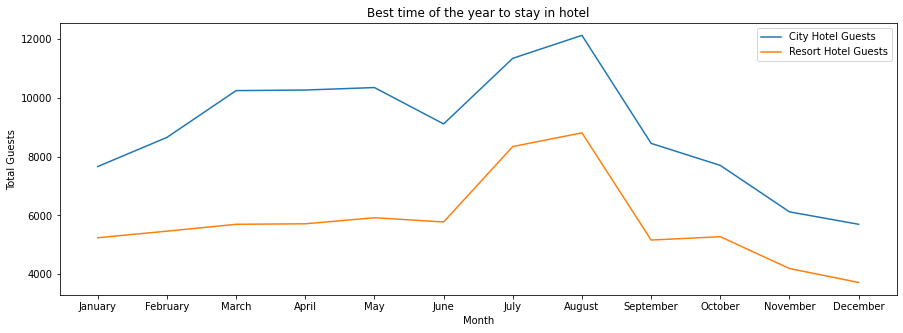

In [ ]:
# Plotting the graph for the above table.
plt.plot(df_hotel_comparison)
plt.legend(["City Hotel Guests", "Resort Hotel Guests"], loc = "upper right")
plt.xlabel("Month")
plt.ylabel("Total Guests")
plt.title("Best time of the year to stay in hotel")
# plt.rcParams["figure.figsize"]=(15,5)




1.   After looking at the above graph we can say that even after analyzing the data of CITY and RESORT hotel saperately the fact that the "Best time to book an hotel is month of JULY and AUGUST" remains the same.
2.   From the above table we can also conclude that throughout the year the people prefer CITY hotels more than the RESORT hotel.

